# ANÁLISIS DE LOS DATOS DE ESTACIONES DE BICIMAD

In [1]:
# Los datos se han obtenido del portal público de información de la Empresa Municipal de Transportes de Madrid

In [2]:
# La EMT no dispone de un Modelo de Datos para los json generados sobre las estaciones, por tanto, hay variables que no se ha
# podido entender qué información aportan.

In [3]:
#Librerías
import json
from pandas.io.json import json_normalize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CARGA Y LECTURA DE DATOS

In [4]:
# Importo la base de Stations de junio 2020
df_StationsJunio = pd.read_json('202006_stations/202006_stations.json', lines=True)
df_StationsJunio

,_id,stations
0,2020-06-01T00:44:29.888088,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
1,2020-06-01T01:44:31.265557,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
2,2020-06-01T02:44:33.064005,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
3,2020-06-01T03:44:33.326813,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
4,2020-06-01T04:44:35.115759,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
...,...,...
711,2020-06-30T19:27:19.495354,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
712,2020-06-30T20:27:22.397351,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
713,2020-06-30T21:27:23.593340,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."
714,2020-06-30T22:27:26.115292,"[{'activate': 1, 'name': 'Puerta del Sol A', '..."


In [5]:
# Se ve la información contenida en la variable "stations"
df_StationsJunio["stations"][0]

[{'activate': 1,
  'name': 'Puerta del Sol A',
  'reservations_count': 0,
  'light': 0,
  'total_bases': 30,
  'free_bases': 25,
  'number': '1a',
  'longitude': '-3.70178074',
  'no_available': 0,
  'address': 'Puerta del Sol nº 1',
  'latitude': '40.41715281',
  'dock_bikes': 3,
  'id': 1},
 {'activate': 1,
  'name': 'Puerta del Sol B',
  'reservations_count': 0,
  'light': 0,
  'total_bases': 30,
  'free_bases': 25,
  'number': '1b',
  'longitude': '-3.701642',
  'no_available': 0,
  'address': 'Puerta del Sol nº 1',
  'latitude': '40.417189',
  'dock_bikes': 5,
  'id': 2},
 {'activate': 1,
  'name': 'Miguel Moya',
  'reservations_count': 0,
  'light': 0,
  'total_bases': 24,
  'free_bases': 16,
  'number': '2',
  'longitude': '-3.7058415',
  'no_available': 0,
  'address': 'Calle Miguel Moya nº 1',
  'latitude': '40.4205886',
  'dock_bikes': 2,
  'id': 3},
 {'activate': 1,
  'name': 'Plaza Conde Suchil',
  'reservations_count': 0,
  'light': 2,
  'total_bases': 18,
  'free_bases': 

In [6]:
df_StationsJunio["_id"][8]

'2020-06-01T08:44:43.941758'

In [7]:
data = df_StationsJunio["stations"][0]

In [34]:
# Veo que con json_normalize puedo transformar el contenido de este objeto en un dataframe
Stations0 = json_normalize(data)
Stations0.head()

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id
0,1,Puerta del Sol A,0,0,30,25,1a,-3.70178074,0,Puerta del Sol nº 1,40.41715281,3,1
1,1,Puerta del Sol B,0,0,30,25,1b,-3.701642,0,Puerta del Sol nº 1,40.417189,5,2
2,1,Miguel Moya,0,0,24,16,2,-3.7058415,0,Calle Miguel Moya nº 1,40.4205886,2,3
3,1,Plaza Conde Suchil,0,2,18,9,3,-3.7069171,0,Plaza del Conde Suchil nº 2-4,40.4302937,8,4
4,1,Malasaña,0,0,24,18,4,-3.7025875,0,Calle Manuela Malasaña nº 5,40.4285524,3,5


In [36]:
Stations0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 13 columns):
activate              214 non-null int64
name                  214 non-null object
reservations_count    214 non-null int64
light                 214 non-null int64
total_bases           214 non-null int64
free_bases            214 non-null int64
number                214 non-null object
longitude             214 non-null object
no_available          214 non-null int64
address               214 non-null object
latitude              214 non-null object
dock_bikes            214 non-null int64
id                    214 non-null int64
dtypes: int64(8), object(5)
memory usage: 21.9+ KB


# CREACIÓN Y ANÁLISIS DEL DATAFRAME DE ESTACIONES

In [38]:
# Paso a DataFrame todo el json de estaciones
df_StationsJunio = pd.read_json('202006_stations/202006_stations.json', lines=True)

ids = df_StationsJunio["_id"]
stations = df_StationsJunio["stations"].map(lambda x: json_normalize(x))
for i in range(len(stations)):
    station = stations[i]
    station["_id"] = ids[i]
    
aux = stations.tolist()

type(stations)

pandas.core.series.Series

In [39]:
stations_flatten = pd.concat([r for r in stations], ignore_index=True)
stations_flatten

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id,_id
0,1,Puerta del Sol A,0,0,30,25,1a,-3.70178074,0,Puerta del Sol nº 1,40.41715281,3,1,2020-06-01T00:44:29.888088
1,1,Puerta del Sol B,0,0,30,25,1b,-3.701642,0,Puerta del Sol nº 1,40.417189,5,2,2020-06-01T00:44:29.888088
2,1,Miguel Moya,0,0,24,16,2,-3.7058415,0,Calle Miguel Moya nº 1,40.4205886,2,3,2020-06-01T00:44:29.888088
3,1,Plaza Conde Suchil,0,2,18,9,3,-3.7069171,0,Plaza del Conde Suchil nº 2-4,40.4302937,8,4,2020-06-01T00:44:29.888088
4,1,Malasaña,0,0,24,18,4,-3.7025875,0,Calle Manuela Malasaña nº 5,40.4285524,3,5,2020-06-01T00:44:29.888088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153329,1,Plaza de Castilla,0,0,24,17,208,-3.6886388,0,"Paseo Castellana, 216",40.4663611,7,216,2020-06-30T23:27:27.100695
153330,1,Plaza de Castilla 2,0,2,24,13,209,-3.6887722,0,Paseo Castellana (Fundación Canal),40.4656779,10,217,2020-06-30T23:27:27.100695
153331,1,Tres Cruces,0,2,27,17,210,-3.7026735,0,Tres Cruces 7,40.419674,9,218,2020-06-30T23:27:27.100695
153332,1,Desengaño,0,2,24,12,211,-3.70239,0,Desengaño 1,40.42059,9,219,2020-06-30T23:27:27.100695


In [11]:
stations_flatten.isnull().sum()

activate              0
name                  0
reservations_count    0
light                 0
total_bases           0
free_bases            0
number                0
longitude             0
no_available          0
address               0
latitude              0
dock_bikes            0
id                    0
_id                   0
dtype: int64

In [12]:
stations_flatten.dtypes

activate               int64
name                  object
reservations_count     int64
light                  int64
total_bases            int64
free_bases             int64
number                object
longitude             object
no_available           int64
address               object
latitude              object
dock_bikes             int64
id                     int64
_id                   object
dtype: object

In [13]:
stations_flatten.describe()

,activate,reservations_count,light,total_bases,free_bases,no_available,dock_bikes,id
count,153334.0,153334.000000,153334.000000,153334.000000,153334.000000,153334.000000,153334.000000,153334.000000
mean,1.0,0.085271,1.139754,23.904542,12.206458,0.018737,9.856053,111.680567
std,0.0,0.317142,0.920897,2.062202,6.235664,0.135595,6.165610,63.017819
min,1.0,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,0.000000,0.000000,24.000000,8.000000,0.000000,5.000000,57.000000
50%,1.0,0.000000,1.000000,24.000000,12.000000,0.000000,9.000000,113.000000
75%,1.0,0.000000,2.000000,24.000000,17.000000,0.000000,14.000000,166.000000
max,1.0,4.000000,3.000000,30.000000,30.000000,1.000000,30.000000,220.000000


In [14]:
stations_flatten["time"] = pd.to_datetime(stations_flatten["_id"])
stations_flatten["time"]

0        2020-06-01 00:44:29.888088
1        2020-06-01 00:44:29.888088
2        2020-06-01 00:44:29.888088
3        2020-06-01 00:44:29.888088
4        2020-06-01 00:44:29.888088
                    ...            
153329   2020-06-30 23:27:27.100695
153330   2020-06-30 23:27:27.100695
153331   2020-06-30 23:27:27.100695
153332   2020-06-30 23:27:27.100695
153333   2020-06-30 23:27:27.100695
Name: time, Length: 153334, dtype: datetime64[ns]

In [46]:
stations_flatten.head()

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id,_id
0,1,Puerta del Sol A,0,0,30,25,1a,-3.70178074,0,Puerta del Sol nº 1,40.41715281,3,1,2020-06-01T00:44:29.888088
1,1,Puerta del Sol B,0,0,30,25,1b,-3.701642,0,Puerta del Sol nº 1,40.417189,5,2,2020-06-01T00:44:29.888088
2,1,Miguel Moya,0,0,24,16,2,-3.7058415,0,Calle Miguel Moya nº 1,40.4205886,2,3,2020-06-01T00:44:29.888088
3,1,Plaza Conde Suchil,0,2,18,9,3,-3.7069171,0,Plaza del Conde Suchil nº 2-4,40.4302937,8,4,2020-06-01T00:44:29.888088
4,1,Malasaña,0,0,24,18,4,-3.7025875,0,Calle Manuela Malasaña nº 5,40.4285524,3,5,2020-06-01T00:44:29.888088


0    141833
1     10083
2      1263
3       154
4         1
Name: reservations_count, dtype: int64

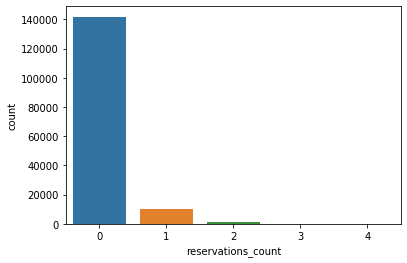

In [16]:
sns.countplot(stations_flatten['reservations_count'])
stations_flatten['reservations_count'].value_counts()

In [17]:
bases = stations_flatten.groupby(["id", "total_bases"])["free_bases"].mean().reset_index()
total_bicis = bases["total_bases"].sum()
print(total_bicis)

5166


In [18]:
bases["total_bases"].describe()

count    216.000000
mean      23.916667
std        2.066904
min       12.000000
25%       24.000000
50%       24.000000
75%       24.000000
max       30.000000
Name: total_bases, dtype: float64

In [19]:
Stations0.nlargest(10, 'total_bases')[['name', 'total_bases']].sort_values(by='total_bases', ascending=False)

,name,total_bases
0,Puerta del Sol A,30
1,Puerta del Sol B,30
20,Banco de España A,30
89,General Pardiñas,30
5,Fuencarral,27
30,San Quintín,27
31,Calle Mayor,27
39,Plaza de la Cebada,27
51,Ronda de Atocha,27
67,Puerta del Ángel Caído,27


In [20]:
Stations0.nsmallest(10, 'total_bases')[['name', 'total_bases']].sort_values(by='total_bases')

,name,total_bases
143,Pº Castellana - Glorieta de Emilio Castelar,12
3,Plaza Conde Suchil,18
32,Plaza de la Provincia,18
41,Antón Martín,18
105,Colón A,18
106,Colón B,18
148,María Francisca 1,18
193,Diego de león,18
209,Remonta,18
132,Santa Engracia 127,20


In [21]:
stations_flatten.activate.value_counts()

1    153334
Name: activate, dtype: int64

2    68610
0    52927
1    28924
3     2873
Name: light, dtype: int64

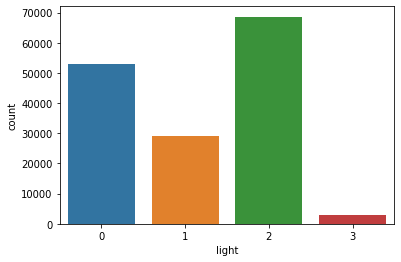

In [22]:
sns.countplot(stations_flatten.light)
stations_flatten.light.value_counts()

0    150461
1      2873
Name: no_available, dtype: int64

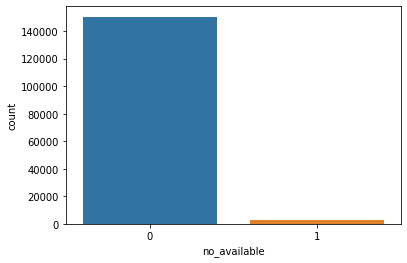

In [23]:
sns.countplot(stations_flatten.no_available)
stations_flatten.no_available.value_counts()

In [24]:
stations_flatten[stations_flatten.no_available == 1]

,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id,_id,time
14,1,Ventura Rodríguez,0,3,24,0,14,-3.7134790,1,Calle Ventura Rodríguez nº 2,40.4260957,0,15,2020-06-01T00:44:29.888088,2020-06-01 00:44:29.888088
111,1,Arcipreste de Hita A,0,3,24,3,111a,-3.7175435,1,Calle Arcipreste de Hita nº 12,40.4337322,18,117,2020-06-01T00:44:29.888088,2020-06-01 00:44:29.888088
162,1,Colombia,0,3,24,2,160,-3.6763439,1,Calle Colombia nº 7,40.4572466,21,172,2020-06-01T00:44:29.888088,2020-06-01 00:44:29.888088
228,1,Ventura Rodríguez,0,3,24,0,14,-3.7134790,1,Calle Ventura Rodríguez nº 2,40.4260957,0,15,2020-06-01T01:44:31.265557,2020-06-01 01:44:31.265557
325,1,Arcipreste de Hita A,0,3,24,3,111a,-3.7175435,1,Calle Arcipreste de Hita nº 12,40.4337322,18,117,2020-06-01T01:44:31.265557,2020-06-01 01:44:31.265557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153188,1,Doce de Octubre,0,3,24,0,71,-3.6738865,1,Calle Doce de Octubre nº 28,40.4159569,0,75,2020-06-30T23:27:27.100695,2020-06-30 23:27:27.100695
153263,1,Castellana 42,0,3,24,0,142,-3.6879154,1,Paseo de la Castellana nº 42,40.4334087,0,167,2020-06-30T23:27:27.100695,2020-06-30 23:27:27.100695
153266,1,Ortega y Gasset 87,0,3,24,0,145,-3.6712823,1,Calle Ortega y Gasset nº 87,40.4298870,0,171,2020-06-30T23:27:27.100695,2020-06-30 23:27:27.100695
153268,1,Doctor Arce 45,0,3,24,0,147,-3.6797296,1,Avenida del Doctor Arce nº 45,40.4483269,0,148,2020-06-30T23:27:27.100695,2020-06-30 23:27:27.100695


In [25]:
select = ["address", "id", "latitude", "longitude"]
estaciones = stations_flatten[select]
estaciones

,address,id,latitude,longitude
0,Puerta del Sol nº 1,1,40.41715281,-3.70178074
1,Puerta del Sol nº 1,2,40.417189,-3.701642
2,Calle Miguel Moya nº 1,3,40.4205886,-3.7058415
3,Plaza del Conde Suchil nº 2-4,4,40.4302937,-3.7069171
4,Calle Manuela Malasaña nº 5,5,40.4285524,-3.7025875
...,...,...,...,...
153329,"Paseo Castellana, 216",216,40.4663611,-3.6886388
153330,Paseo Castellana (Fundación Canal),217,40.4656779,-3.6887722
153331,Tres Cruces 7,218,40.419674,-3.7026735
153332,Desengaño 1,219,40.42059,-3.70239


In [44]:
estaciones["latitude"] = pd.to_numeric(estaciones["latitude"])
estaciones["longitude"] = pd.to_numeric(estaciones["longitude"])

C:\Users\adria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\adria\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
estaciones

,address,id,latitude,longitude
0,Puerta del Sol nº 1,1,40.417153,-3.701781
1,Puerta del Sol nº 1,2,40.417189,-3.701642
2,Calle Miguel Moya nº 1,3,40.420589,-3.705842
3,Plaza del Conde Suchil nº 2-4,4,40.430294,-3.706917
4,Calle Manuela Malasaña nº 5,5,40.428552,-3.702587
...,...,...,...,...
153329,"Paseo Castellana, 216",216,40.466361,-3.688639
153330,Paseo Castellana (Fundación Canal),217,40.465678,-3.688772
153331,Tres Cruces 7,218,40.419674,-3.702673
153332,Desengaño 1,219,40.420590,-3.702390


In [28]:
estaciones_agg = estaciones.groupby(["id"]).mean().reset_index()
estaciones_agg

,id,latitude,longitude
0,1,40.417191,-3.701814
1,2,40.417266,-3.701618
2,3,40.420589,-3.705841
3,4,40.430294,-3.706917
4,5,40.428552,-3.702587
...,...,...,...
210,216,40.466361,-3.688639
211,217,40.465678,-3.688772
212,218,40.419674,-3.702673
213,219,40.420590,-3.702390


In [29]:
# Uso encoding = iso8859_15
estaciones_agg.to_csv('C:/Users/adria/Documents/TFM/estaciones_agg.csv', index= False, encoding= 'iso8859_15', sep= ';')

In [ ]:
# Como se indica al principio, al no disponer de un Modelo de Datos para esta información de la EMT, por el momento 
# no se profundiza más en esta información.